# ADA BOOST CLASSIFIER ALGORITHEM

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [12]:
df = pd.read_csv('ATTACK.csv')
df.head()

,FWT_TOT,PORT,PROCOLS,TTPE,SERVICE,FLOW_DURATION,BWD_TOT,FWT_DATA,BWD_DATA,DOWN_UP_RATION,FWD_SIZE,BWD_SIZE,FNN_FLAG,SYN_FLAG,RST_FLAG,PSH_FLAG,ACK_FLAG,URG_FLAG,Attack_type
0,9,38667,1883,tcp,mqtt,32.011598,5,3,3,0.555556,296,168,0,2,1,3,13,0,MQTT_Publish
1,9,51143,1883,tcp,mqtt,31.883584,5,3,3,0.555556,296,168,0,2,1,3,13,0,MQTT_Publish
2,9,44761,1883,tcp,mqtt,32.124053,5,3,3,0.555556,296,168,0,2,1,3,13,0,MQTT_Publish
3,9,60893,1883,tcp,mqtt,31.961063,5,3,3,0.555556,296,168,0,2,1,3,13,0,MQTT_Publish
4,9,51087,1883,tcp,mqtt,31.902362,5,3,3,0.555556,296,168,0,2,1,3,13,0,MQTT_Publish


In [13]:
df.columns

Index(['FWT_TOT', 'PORT', 'PROCOLS', 'TTPE', 'SERVICE', 'FLOW_DURATION',
       'BWD_TOT', 'FWT_DATA', 'BWD_DATA', 'DOWN_UP_RATION', 'FWD_SIZE',
       'BWD_SIZE', 'FNN_FLAG', 'SYN_FLAG', 'RST_FLAG', 'PSH_FLAG', 'ACK_FLAG',
       'URG_FLAG', 'Attack_type'],
      dtype='object')

In [14]:
df['Attack_type'].unique()

array(['MQTT_Publish', 'Normal', 'Wipro_bulb', 'ARP_poisioning',
       'DDOS_Slowloris', 'DOS_SYN_Hping', 'Metasploit_Brute_Force_SSH',
       'NMAP_FIN_SCAN', 'NMAP_OS_DETECTION', 'NMAP_TCP_scan',
       'NMAP_UDP_SCAN', 'NMAP_XMAS_TREE_SCAN'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

var = ['Attack_type',"SERVICE","TTPE"]
  
for i in var:
    df[i] = le.fit_transform(df[i]).astype(int)

In [16]:
df['Attack_type'].unique()

array([ 3, 10, 11,  0,  1,  2,  4,  5,  6,  7,  8,  9])

In [17]:
df=df.dropna()

In [18]:
df.tail()

,FWT_TOT,PORT,PROCOLS,TTPE,SERVICE,FLOW_DURATION,BWD_TOT,FWT_DATA,BWD_DATA,DOWN_UP_RATION,FWD_SIZE,BWD_SIZE,FNN_FLAG,SYN_FLAG,RST_FLAG,PSH_FLAG,ACK_FLAG,URG_FLAG,Attack_type
123112,1,59247,63331,1,0,0.000006,1,0,0,1.0,20,20,1,0,1,1,1,1,9
123113,1,59247,64623,1,0,0.000007,1,0,0,1.0,20,20,1,0,1,1,1,1,9
123114,1,59247,64680,1,0,0.000006,1,0,0,1.0,20,20,1,0,1,1,1,1,9
123115,1,59247,65000,1,0,0.000006,1,0,0,1.0,20,20,1,0,1,1,1,1,9
123116,1,59247,65129,1,0,0.000006,1,0,0,1.0,20,20,1,0,1,1,1,1,9


In [19]:
x1 = df.drop(labels='Attack_type', axis=1)
y1 = df.loc[:,'Attack_type']

In [20]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x,y=ros.fit_resample(x1,y1)
print("OUR DATASET COUNT         : ", Counter(y1))
print("OVER SAMPLING DATA COUNT  : ", Counter(y))

OUR DATASET COUNT         :  Counter({2: 94659, 10: 8108, 0: 7750, 3: 4146, 8: 2590, 9: 2010, 6: 2000, 7: 1002, 1: 534, 11: 253, 4: 37, 5: 28})
OVER SAMPLING DATA COUNT  :  Counter({3: 94659, 10: 94659, 11: 94659, 0: 94659, 1: 94659, 2: 94659, 4: 94659, 5: 94659, 6: 94659, 7: 94659, 8: 94659, 9: 94659})


In [21]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=6, stratify=y)
print("NUMBER OF TRAIN DATASET    : ", len(x_train))
print("NUMBER OF TEST DATASET      : ", len(x_test))
print("TOTAL NUMBER OF DATASET    : ", len(x_train)+len(x_test))

NUMBER OF TRAIN DATASET    :  908726
NUMBER OF TEST DATASET      :  227182
TOTAL NUMBER OF DATASET    :  1135908


In [22]:
print("NUMBER OF TRAIN DATASET    : ", len(y_train))
print("NUMBER OF TEST DATASET      : ", len(y_test))
print("TOTAL NUMBER OF DATASET    : ", len(y_train)+len(y_test))

NUMBER OF TRAIN DATASET    :  908726
NUMBER OF TEST DATASET      :  227182
TOTAL NUMBER OF DATASET    :  1135908


In [23]:
from sklearn.ensemble import AdaBoostClassifier

In [24]:
ADA = AdaBoostClassifier()
ADA.fit(x_train,y_train)

AdaBoostClassifier()

In [25]:
predicted = ADA.predict(x_test)

In [26]:

from sklearn.metrics import accuracy_score
a = accuracy_score(y_test,predicted)
print("THE ACCURACY SCORE OF ADA BOOST CLASSIFIER IS :",a*100)

THE ACCURACY SCORE OF ADA BOOST CLASSIFIER IS : 37.16051447737937


In [27]:
from sklearn.metrics import hamming_loss
hl = hamming_loss(y_test,predicted)
print("THE HAMMING LOSS OF ADA BOOST CLASSIFIER IS :",hl*100)

THE HAMMING LOSS OF ADA BOOST CLASSIFIER IS : 62.83948552262063


In [28]:
from sklearn.metrics import classification_report
C = classification_report(y_test,predicted)
print("THE CLASSIFICATION REPORT SCORE OF ADA BOOST CLASSIFIER IS :\n\n",C)

THE CLASSIFICATION REPORT SCORE OF ADA BOOST CLASSIFIER IS :

               precision    recall  f1-score   support

           0       0.21      0.46      0.29     18932
           1       0.36      0.98      0.52     18932
           2       0.00      0.00      0.00     18932
           3       0.00      0.00      0.00     18932
           4       0.73      0.03      0.05     18932
           5       0.00      0.00      0.00     18932
           6       0.00      0.00      0.00     18932
           7       0.49      0.97      0.65     18932
           8       0.32      0.93      0.47     18931
           9       1.00      1.00      1.00     18932
          10       0.02      0.00      0.01     18932
          11       0.63      0.10      0.17     18931

    accuracy                           0.37    227182
   macro avg       0.31      0.37      0.26    227182
weighted avg       0.31      0.37      0.26    227182



In [29]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(ADA, x, y, scoring='accuracy')
print('THE CROSS VALIDATION TEST RESULT OF ACCURACY :\n\n\n', accuracy*100)

THE CROSS VALIDATION TEST RESULT OF ACCURACY :


 [37.04210721 37.03374387 37.07115881 37.07132199 37.13954952]


In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,predicted)
print('THE CONFUSION MATRIX SCORE OF ADA BOOST CLASSIFIER:\n\n\n',cm)

THE CONFUSION MATRIX SCORE OF ADA BOOST CLASSIFIER:


 [[ 8635  7805     0     0   158     0     0     2   409     0  1016   907]
 [  178 18502     0     0    33     0     0     0   219     0     0     0]
 [    0     0     0     0     0     0     0     0 18932     0     0     0]
 [18856    16     0     0     0     0     0     7    51     0     0     2]
 [ 2034  2084     0     0   519 14295     0     0     0     0     0     0]
 [    0  2698     0     0     0     0     0     0 16234     0     0     0]
 [    0     0     0     0     0     0     0 18422   510     0     0     0]
 [    0     0     0     0     0     0     0 18349   583     0     0     0]
 [  195  1086     0     0     0     0     0     0 17643     0     7     0]
 [    0    34     0     0     0     0     0     0     0 18898     0     0]
 [ 2881 15610     0     0     2     0     0     0   238     0    73   128]
 [ 8060  3938     0     0     0     0     0   352  1188     0  3590  1803]]


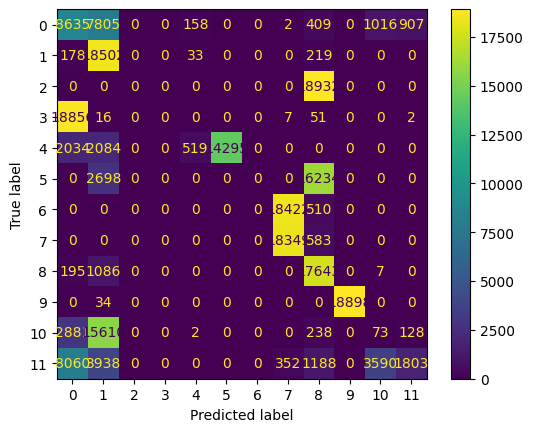

In [63]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
CMD = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=ADA.classes_)
CMD.plot()
plt.show()

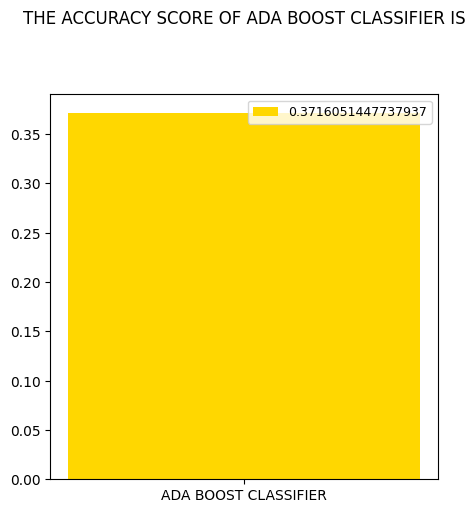

In [64]:
def graph():
    import matplotlib.pyplot as plt
    data=[a]
    alg="ADA BOOST CLASSIFIER"
    plt.figure(figsize=(5,5))
    b=plt.bar(alg,data,color=("gold"))
    plt.title("THE ACCURACY SCORE OF ADA BOOST CLASSIFIER IS\n\n\n")
    plt.legend(b,data,fontsize=9)
graph()

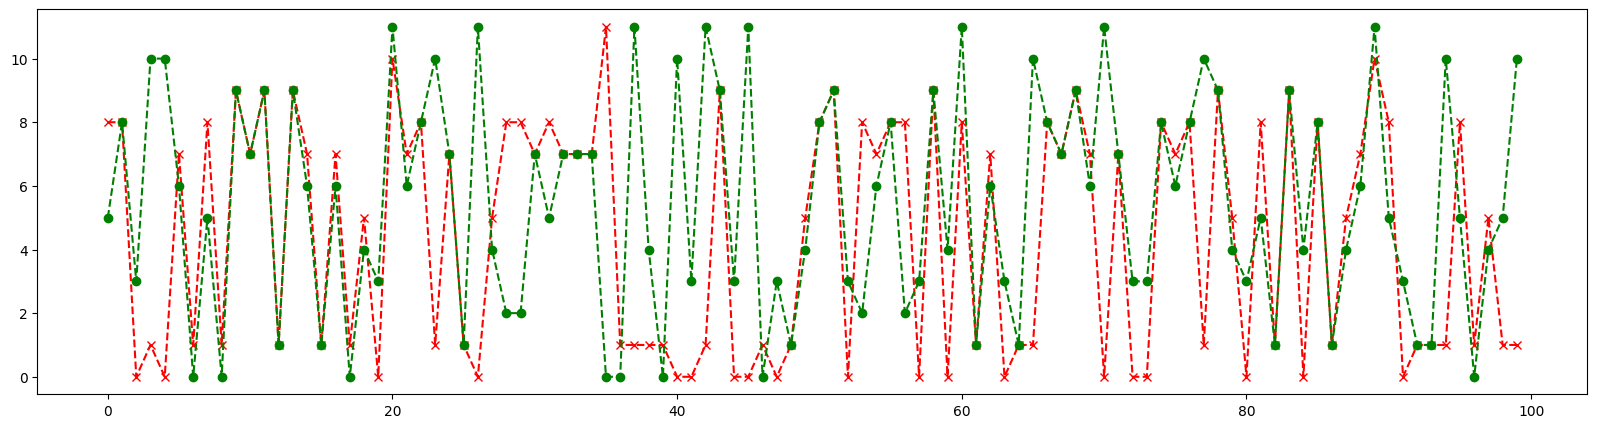

In [65]:
import matplotlib.pyplot as plt
df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"][:100], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"][:100],  marker='o', linestyle='dashed', color='green')
plt.show()